### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 26th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [1]:
# 1) Read in hw4_data_1.npy. This is a (10 x 2) numpy array, with voltage measurements in the first column and 
#heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on 
#the sample mean for this data.

#Importing packages
import numpy as np
from scipy import optimize

#obtaining data from hw4_data_1
data = np.load('../../../../coursework/homeworks/hw_data/hw4_data_1.npy') #reading data
#print(np.shape(data))
Volt = data[:,0] #voltage measurements
uncrt = data[:,1]  #heteroschedastoc voltage uncertainty

#Making sure it looks alright
# print(Volt,'volt')
# print(uncrt,'uncrt')

#Calculating the sample mean and standard error
samp_mean = (np.sum(Volt/uncrt**2))/(np.sum(1/uncrt**2)) #sample mean 
print('sample mean =',samp_mean)

sigma_mu = (np.sum(1/uncrt**2))**-0.5 #standard error
print('standard error =',sigma_mu)

sample mean = 4.942118214425304
standard error = 0.43024334605205083


SRT: Very good.

In [2]:
# 2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage

#Importing more packages
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform

#fitting function to calculate ln likelihood
def f(b, v, u): 
    v_fit = b #only need one constant to find fit
    return np.sum(((v - v_fit) / u) ** 2, -1) #ln likelihood


f_squared = lambda beta: f(beta, v=Volt, u=uncrt) #best fit
beta0 = (4) #guess
beta_squared1 = optimize.fmin(f_squared, beta0) 
print('best fit mean =',beta_squared1)

Optimization terminated successfully.
         Current function value: 5.614502
         Iterations: 15
         Function evaluations: 30
best fit mean = [4.94208984]


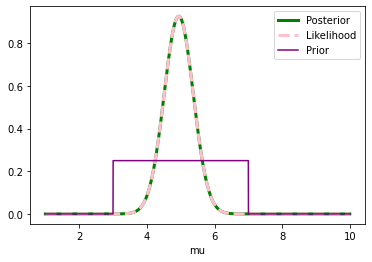

In [133]:
# 3) Compute and plot the Bayesian posterior probability density (not the log posterior) for the mean voltage 
#assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

import matplotlib.pyplot as plt

C = 1/(7-3) # uniform prior for the mean in the range 3-7
N = 10000 
Carr = np.zeros(N)
Carr = np.full(N,C) #array of length N filled with C values
#print(Carr,'carr')
xgrid = np.linspace(1,10,N) #grid space of len N
Carr[xgrid < 3] = 0 # taking into account our prior information
Carr[xgrid > 7] = 0 # taking into account our prior information
Ltoo = []
L = []
prod=[]
pr = []

for i in range(len(xgrid)):
    L1 = norm.pdf(Volt,loc=xgrid[i],scale=uncrt) #obtaining the likelihood
    #print(L1)
    Ltoo.append(np.prod(L1))

#Making likelihood into array
Ltoo = np.array(Ltoo) #likelihoods
#print(Ltoo)

# Posterior = likelihood * prior
post = Ltoo*Carr

#Normalizing posterior and likelihood
normlp = post/(np.sum(post)*(xgrid[1]-xgrid[0])) #posterior over sum of posterior times distance between points
normlL = Ltoo/(np.sum(Ltoo)*(xgrid[1]-xgrid[0])) #L over sum of likelihoods times distance between points

#Plotting 
plt.plot(xgrid, normlp,color='green',lw=3.0,label='Posterior')
plt.plot(xgrid, normlL,color='pink',ls='--',lw=3.0,label='Likelihood')
plt.plot(xgrid,Carr,color='purple',lw=1.5,label='Prior')
plt.xlabel('mu')
plt.legend()

SRT: Nicely done.

In [36]:
# 4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the 
#equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean 
#plus/minus the standard error, respectively. Also find the MAP value of the mean.

#Obtaining from histogram, a scipy.stats object and calculating ppf -> equal tailed region
hist = scipy.stats.rv_histogram((normlp[:-1],xgrid))
ppf16 = hist.ppf(0.16) #16%
ppf84 = hist.ppf(0.84) #84%

print(ppf16,'16%')
print(ppf84,'84%')

# Finding the MAP
hist1=normlp
bin_mid = 0.5 * (xgrid[1:] + xgrid[:-1])
idx = np.argsort(hist1)[-1]
mapp = bin_mid[idx]
print(mapp,'MAP')

4.514713787340796 16%
5.370426920806626 84%
4.942844284428443 MAP


SRT: Awesome!

4.736656664383979 16%
5.237544735858949 84%
4.942844284428443 MAP


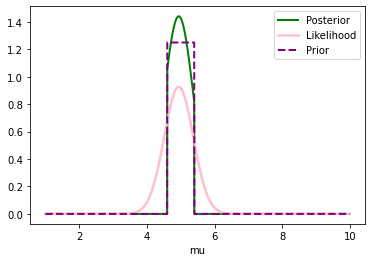

In [132]:
# 5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 
 
C2 = 1/(5.4-4.6) # uniform prior for the mean in the range 4.6-5.4
Carr2 = np.zeros(N)
Carr2 = np.full(N,C2) #array of priors
Carr2[xgrid < 4.6] = 0
Carr2[xgrid > 5.4] = 0
L2s = []
L = []
prod=[]
pr = []

for i in range(len(xgrid)):
    L2 = norm.pdf(Volt,loc=xgrid[i],scale=uncrt) #likelihood over grid
    L2s.append(np.prod(L2))

L2s = np.array(L2s) #likelihoods

# Posterior = likelihood * prior
post2 = L2s*Carr2

#Normalizing posterior and likelihood
normlp2 = post2/(np.sum(post2)*(xgrid[1]-xgrid[0]))#posterior over sum of posterior times distance between points
normlL2 = L2s/(np.sum(L2s)*(xgrid[1]-xgrid[0])) #L over sum of likelihoods times distance between points

#Plotting 
plt.plot(xgrid, normlp2,color='green',lw=2.0,label='Posterior')
plt.plot(xgrid, normlL2,color='pink',lw=2.5,label='Likelihood')
plt.plot(xgrid,Carr2,color='purple',lw=2.0,ls='--',label='Prior')
plt.xlabel('mu')
plt.legend()

#Obtaining from histogram, a scipy.stats object and calculating ppf -> equal tailed region
hist2 = scipy.stats.rv_histogram((normlp2[:-1],xgrid))
ppf216 = hist2.ppf(0.16)
ppf284 = hist2.ppf(0.84)
print(ppf216,'16%')
print(ppf284,'84%')

# Finding the MAP
hist_2=normlp2
bin_mid2 = 0.5 * (xgrid[1:] + xgrid[:-1])
idx2 = np.argsort(hist_2)[-1]
mapp2 = bin_mid2[idx2]
print(mapp2,'MAP')

5.409651922715856 16%
5.899091628835403 84%
5.654815481548154 MAP


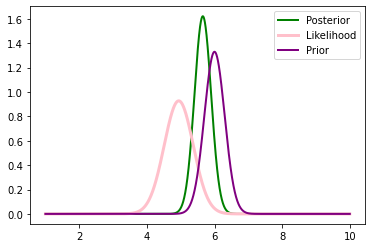

In [130]:
# 6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they
#found that the mean was actually 6±0.3. Repeat (3) and (4) this time with a Gaussian prior on the mean centered 
#at 6 with standard deviation of 0.3

LG = []
Carrg = norm.pdf(xgrid,loc=6,scale=0.3) #prior on mean centered at 6 with standard deviation 0.3

for i in range(len(xgrid)):
    Lg = norm.pdf(Volt,loc=xgrid[i],scale=uncrt) #likelihood over grid
    LG.append(np.prod(Lg))
    
# Posterior = likelihood * prior
postg = LG*Carrg

#Normalizing posterior and likelihood
normlpg = postg/(np.sum(postg)*(xgrid[1]-xgrid[0])) 
normlLg = LG/(np.sum(LG)*(xgrid[1]-xgrid[0])) 

#Plotting 
plt.plot(xgrid, normlpg,color='green',lw=2.0,label='Posterior')
plt.plot(xgrid, normlLg,color='pink',lw=3.0,label='Likelihood')
plt.plot(xgrid,Carrg,color='purple',lw=2.0,label='Prior')
plt.xlabel('mu')
plt.legend()

#Obtaining from histogram, a scipy.stats object and calculating ppf -> equal tailed region
histg = scipy.stats.rv_histogram((normlpg[:-1],xgrid))
ppfg16 = histg.ppf(0.16)
ppfg84 = histg.ppf(0.84)
print(ppfg16,'16%')
print(ppfg84,'84%')

# Finding the MAP
hist_g=normlpg
bin_midg = 0.5 * (xgrid[1:] + xgrid[:-1])
idxg = np.argsort(hist_g)[-1]
mappg = bin_midg[idxg]
print(mappg,'MAP')

SRT: Excellent work, Valeria.

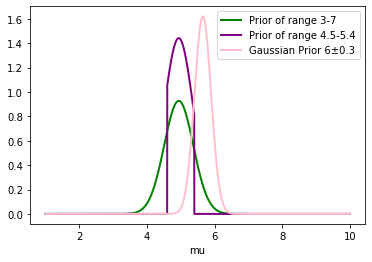

In [136]:
# 7) Plot all of the normalized posterior pdfs for 𝜇 from (3), (5), and (6) on the same plot, making sure that 
#the xlim of the plot spans 0 to 10.

plt.plot(xgrid,normlp,color='green',lw=2.0,label='Prior of range 3-7')
plt.plot(xgrid,normlp2,color='purple',lw=2.0,label='Prior of range 4.5-5.4')
plt.plot(xgrid,normlpg,color='pink',lw=2.0,label='Gaussian Prior 6±0.3')
plt.xlabel('mu')
plt.legend()

In [137]:
# 8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the 
#meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! 
#Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value 
#you found in (1) (think about this and don't just immediately go looking for a scipy.stats delta function). 
#Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is
#favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly?

from scipy import signal

#Evidence for uniform model
B1 = (np.sum(post)*(xgrid[1]-xgrid[0])) 

#Finding the index for the x value which most resembles the sample mean calculated above
x = np.where((xgrid < samp_mean + 0.001) & (xgrid >= samp_mean))[0]

#Calculating the prior of delta function
priordel = scipy.signal.unit_impulse(N,x)

#Posterior using the delta function prior
postdel = Ltoo*priordel

# Evidence for delta function model
B2 = np.sum(postdel) 

#Bayes factor
Z = B2/B1 #B2 is delta model, B1 is uniform model
print(Z,'-> model 2 is favored!')

print('the least complex model is favored: delta function model')

3.7090061451080483 -> model 2 is favored!
the least complex model is favored: delta function model


/home/valeria/githubrepo/ASTR8020/urrutimv/anaconda3/envs/astr8070/lib/python3.8/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


SRT: Novel use of the unit_impulse function! Another way is just to use the fact that the integral of a pdf against a delta function gives the value of the pdf at the delta spike. So you can just calculate the pdf at the fixed delta position for that evidence.

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in the lecture. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [74]:
# 1) Read in hw4_data_2.npy, which is a (3 x 20) numpy array that you used in Lecture_9. 
# Set x, y, sigma_y = data

In [ ]:
data = np.load('../../../../coursework/homeworks/hw_data/hw4_data_2.npy') #reading data

In [76]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

Text(0.5, 0, 'm')

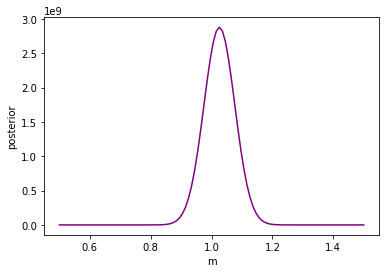

In [138]:
# 2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a 
#grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. 
#Plot this posterior pdf. Remember this is just a one-dimensional model because the 𝑦-intercept is fixed. I 
#advise a grid size of 100.

m = 1/(1.5-0.5) # uniform prior of slope
ms = np.zeros(100)
ms = np.full(100,m) #array of priors for slope

llike = [] #creating empty array for likelihood

mgrid = np.linspace(0.5,1.5,100) #grid array for m

for i in mgrid:
    theta = np.concatenate((-0.23,i),axis=None) #obtaining y intercept (fixed) and theta1
    ls = logL(theta, data, model=polynomial_fit) #obtaining likelihood using function defined above
    llike.append(ls)

llike = np.array(llike) #Making likelihood an array

#Calculating Un-normalized Posterior = likelihood*prior but in log space then converting back again
Post = llike + np.log(ms)
Post = np.exp(Post)

#Plotting
plt.plot(mgrid,Post,color='purple')
plt.ylabel('posterior')
plt.xlabel('m')

In [85]:
#3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a 
#big number!

Bm = (np.sum(Post)*(mgrid[1]-mgrid[0])) #Bayesian evidence
print(Bm) # wow :0000000000000

365684733.1606578


SRT: Very good.

In [97]:
#4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic 
#coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the 
#quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this 
#is a two-dimensional model because the 𝑦-intercept is fixed. I advise a grid size of 100 in each model dimension

m2 = 1/(0.25+1) #quadratic coefficient prior
m2s = np.zeros(100)
m2s = np.full(100,m2) #array of quadratic coefficient prior
mgrid2 = np.linspace(-1,0.25,100) #array of priors for slope
llike2 = [] #empty array for likelihood
P = [] #empty array for posterior

#we want to explore all the possibilities so for every mgrid value we calculate a theta with the mgrid2 array 
for i in range(len(mgrid)): #as done for linear model
    posts2 = []
    for j in range(len(mgrid2)): #second loop for quadratic coefficient
        theta2 = np.concatenate((-0.23,mgrid[i],mgrid2[j]),axis=None) #theta
        ls2 = logL(theta2, data, model=polynomial_fit) #likelihood
        Post2 = ls2 + np.log(ms[i])  + np.log(m2s[j]) #posterior
        llike2.append(ls2)
        posts2.append(np.exp(Post2))
    P.append(posts2)
    
#Making sure everything looks okay
print(np.shape(P))

(100, 100)


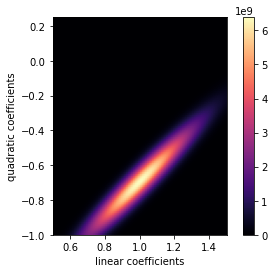

In [102]:
#Plotting 2D posterior pdf
plt.imshow(P,cmap='magma',extent=([mgrid[0],mgrid[-1],mgrid2[0],mgrid2[-1]])) #galaxy-looking-plot B)
plt.colorbar()
plt.xlabel('linear coefficients')
plt.ylabel('quadratic coefficients')
plt.show()

SRT: Nice color scheme!

In [103]:
# 5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model.
Bq = (np.sum(P)*(mgrid[1]-mgrid[0])*(mgrid2[1]-mgrid2[0])) #Bayes evidence for quadratic model
print(Bq) # :0000000000000

493061001.6570572


In [117]:
#6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the 
# BIC model comparison in the lecture?

Z = Bm/Bq
print(Z,'uh oh Bayesian Factor calculation prefers the quadratic model !')

kl = 1 #number of free parameters in linear model
kq = 2 #number of free parameters in quadratic model
BICl = -2*(np.max(llike)) + kl*(np.log(len(llike))) #BIC for linear model
BICq = -2*(np.max(llike2)) + kq*(np.log(len(llike2))) #BIC for quadratic model
print('linear BIC -> ',BICl,'| quadratic BIC ->',BICq) 
print('uh oh BIC prefers the linear model !')

0.7416622526050144 uh oh Bayesian Factor calculation prefers the quadratic model !
linear BIC ->  -38.95553992520727 | quadratic BIC -> -27.179045185730892
uh oh BIC prefers the linear model !


SRT: All correct! Remember, in lectures I mentioned that the BIC is much more severe in penalizing model parameters than the Bayesian evidence. Here the quadratic parameter is clearly doing something useful, and is not wasted. So we actually mildly prefer it.

SRT: Well done, Valeria.